In [288]:
import math

import json
from pprint import pprint
with open('QTable.json') as f:
    Qtable = json.load(f)
print("Length of QTable: " + str(len(Qtable)))

Length of QTable: 321


In [ ]:
# x = 3.5
# z = 5.5

In [241]:
max(Qtable['6:2:45'])

-0.018859746050739395

In [123]:
xs = []; zs = []; yaws = []
for key in Qtable:
    x = int(key[0])
    z = int(key[2])
    yaw = int(key[4:len(key)])
    if x not in xs: xs.append(x)
    if z not in zs: zs.append(z)
    if yaw not in yaws: yaws.append(yaw)
        
print(xs); print(zs); print(yaws)

[1, 2, 3, 4, 5, 6, 0]
[0, 1, 2, 3, 4, 5, 6]
[0, 315, 45, 90, 135, 180, 225, 270]


In [266]:
grid = np.ones((252,252))
block = np.ones((int(252/xBlocks),int(252/zBlocks)))


In [244]:
for key in Qtable:
    x = float(key[0])
    z = float(key[2])
    reward = max(Qtable[key])

In [198]:
reward = -0.009685833699775312

block*math.floor(reward/8)

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,

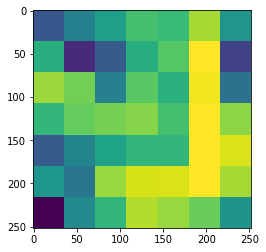

In [296]:
grid = np.ones((252,252))
block = np.ones((int(252/xBlocks),int(252/zBlocks)))

xBlocks = len(xs); zBlocks = len(zs); yawBlocks = len(yaws);
for key in Qtable:
    x = float(key[0])
    z = float(key[2])
    reward = max(Qtable[key])
    amendReward = (reward)
    
    gridXStart = int(x*36)
    gridXEnd = int(x*36 + 252/xBlocks)
    gridZStart = int(z*36)
    gridZEnd = int(z*36 + 252/zBlocks)

    grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(amendReward/8)
    
plt.imshow(grid)


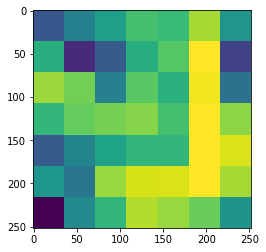

In [291]:
plt.imshow(grid)


#Change the axis

In [293]:
from matplotlib import pyplot as plt
from numpy import genfromtxt
import numpy as np
file = 'qlearningResults.csv'
my_data = genfromtxt(file, delimiter=',')
y = [x[0] for x in my_data]
epsilon = [x[-1] for x in my_data]


In [294]:
print(y)


[-2.389999990463242, -9.999999999776318, -4.479999990463198, -8.509999990463113, -3.029999990463229, -1.9899999904632497, -4.909999990463189, -9.999999999776316, -2.209999990463248, -4.209999990463204]


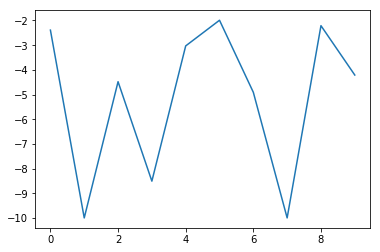

In [295]:
plt.plot(y) # Plot shown when learning with epsilon decay at 0.99

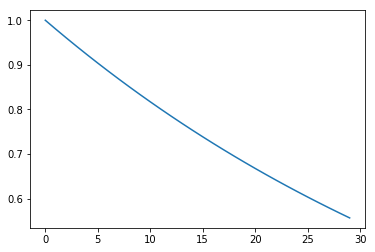

In [287]:
plt.plot(epsilon)

-3.4881818094916923


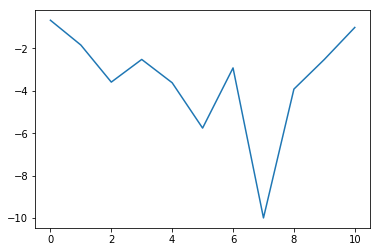

In [5]:
plt.plot(y) # Run when epsilon set to 0 and loaded from q table built from previous 2 runs
print(np.mean(y))